In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [2]:
data_train = pd.read_csv("/kaggle/input/data-storm-6-0/train_storming_round.csv")
data_train.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12  unique_quotations_last_21_days  

In [4]:
data_train.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000
mean,7654.500000,40.585772,1.491246,2.991116,10.045728,17.516527,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886
std,4419.183296,11.688204,1.119554,2.001613,6.037296,6.616954,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,3827.750000,31.000000,0.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000
50%,7654.500000,41.000000,1.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000
75%,11481.250000,51.000000,2.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000
max,15308.000000,60.000000,3.000000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000


In [5]:
data_test = pd.read_csv("/kaggle/input/data-storm-6-0/test_storming_round.csv")
data_test.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,de9a845f,43,6/1/2020,4/1/2022,9/1/2024,0,2,12,17,...,14,6,9,5,20,24,511320,86955,0,48
1,2,1450745b,32,5/1/2019,8/1/2022,9/1/2024,1,3,4,13,...,12,2,2,5,9,14,296660,55062,9,56
2,3,5c4dd08c,52,6/1/2019,6/1/2022,9/1/2024,2,6,17,27,...,21,5,6,10,21,34,833544,224429,0,34
3,4,3c7a8b50,21,5/1/2021,9/1/2023,9/1/2024,1,6,17,26,...,15,3,2,10,15,33,2972409,439159,15,33
4,5,3dd0c2a1,33,9/1/2022,11/1/2023,9/1/2024,0,4,2,8,...,14,5,4,6,15,15,168150,18195,60,90


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           914 non-null    int64 
 1   agent_code                       914 non-null    object
 2   agent_age                        914 non-null    int64 
 3   agent_join_month                 914 non-null    object
 4   first_policy_sold_month          914 non-null    object
 5   year_month                       914 non-null    object
 6   unique_proposals_last_7_days     914 non-null    int64 
 7   unique_proposals_last_15_days    914 non-null    int64 
 8   unique_proposals_last_21_days    914 non-null    int64 
 9   unique_proposal                  914 non-null    int64 
 10  unique_quotations_last_7_days    914 non-null    int64 
 11  unique_quotations_last_15_days   914 non-null    int64 
 12  unique_quotations_last_21_days   914

In [7]:
data_test.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02,914.000000,914.000000,914.000000
mean,457.500000,40.506565,1.540481,2.903720,9.798687,17.318381,2.096280,2.994530,4.450766,13.928884,3.088621,5.025164,7.405908,15.519694,20.114880,1.008371e+06,226420.912473,30.931072,102.386214
std,263.993371,11.698497,1.120848,1.974517,5.999722,6.695894,1.383492,1.995332,2.911676,4.592290,1.595387,2.402632,3.537997,4.767559,9.636944,8.221544e+05,175909.860712,25.300530,76.215860
min,1.000000,20.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,2396.000000,0.000000,0.000000
25%,229.250000,31.000000,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,14.250000,3.419635e+05,92338.750000,11.000000,39.000000
50%,457.500000,41.000000,2.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,7.000000,15.000000,21.000000,8.349145e+05,185448.000000,27.000000,88.000000
75%,685.750000,51.000000,3.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.574566e+06,313027.750000,48.000000,153.750000
max,914.000000,60.000000,3.000000,6.000000,20.000000,33.000000,4.000000,6.000000,9.000000,30.000000,6.000000,10.000000,15.000000,30.000000,42.000000,3.587922e+06,818544.000000,120.000000,333.000000


In [8]:
data_train['train_flag'] = 1
data_test['train_flag'] = 0
all_data = pd.concat([data_train,data_test], axis = 0)
all_data.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,train_flag
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,3,4,8,15,0,0,93313,30,162,1
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,4,3,10,17,25,1071450,164804,0,175,1
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,3,7,11,21,26,1601210,426690,84,78,1
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,2,2,9,13,18,283230,47793,39,144,1
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,3,10,6,19,20,1957680,562239,19,40,1


In [9]:
flag = all_data['train_flag']

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16222 entries, 0 to 913
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           16222 non-null  int64 
 1   agent_code                       16222 non-null  object
 2   agent_age                        16222 non-null  int64 
 3   agent_join_month                 16222 non-null  object
 4   first_policy_sold_month          16222 non-null  object
 5   year_month                       16222 non-null  object
 6   unique_proposals_last_7_days     16222 non-null  int64 
 7   unique_proposals_last_15_days    16222 non-null  int64 
 8   unique_proposals_last_21_days    16222 non-null  int64 
 9   unique_proposal                  16222 non-null  int64 
 10  unique_quotations_last_7_days    16222 non-null  int64 
 11  unique_quotations_last_15_days   16222 non-null  int64 
 12  unique_quotations_last_21_days   16222 

In [11]:
all_data.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,train_flag
count,16222.000000,16222.000000,16222.00000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,16222.000000,1.622200e+04,1.622200e+04,16222.000000,16222.000000,16222.000000
mean,7248.997719,40.581309,1.49402,2.986192,10.031809,17.505363,1.995685,2.996425,4.468561,13.922759,3.000740,4.999260,7.495192,15.495192,20.261250,1.024382e+06,2.279501e+05,30.966219,101.248798,0.943657
std,4602.916045,11.688438,1.11965,2.000137,6.035270,6.621375,1.419081,2.003815,2.877302,4.659639,1.641503,2.436823,3.472501,4.555158,9.546853,8.064301e+05,1.737892e+05,24.659868,75.372165,0.230590
min,1.000000,20.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000,0.000000
25%,3142.250000,31.000000,0.00000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.470725e+05,9.282300e+04,12.000000,38.000000,1.000000
50%,7197.500000,41.000000,1.00000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,7.000000,15.000000,21.000000,8.984835e+05,1.898135e+05,28.000000,90.000000,1.000000
75%,11252.750000,51.000000,2.00000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560760e+06,3.215682e+05,48.000000,152.000000,1.000000
max,15308.000000,60.000000,3.00000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,120.000000,378.000000,1.000000


# **Key Perfomance Indicators(KPIs)**


* KPIs (Key Performance Indicators) are measurable values that helps to assess each agent’s performance.
* KPIs can be used to:
    * Classify agents (High / Medium / Low performers)
    * Track improvements over time
    * Identify what drives high performance
    * Tailor interventions for improvement


### 📌 Key Performance Indicators (KPIs) for Agent Categorization

| **KPI Name**                  | **Description**                              | **Why It's Important**                                      |
|------------------------------|----------------------------------------------|-------------------------------------------------------------|
| `new_policy_count`           | Number of new policies sold in a month       | Directly shows agent sales success                          |
| `ANBP_value`                 | Annualized New Business Premium              | Indicates the monetary value of business brought in         |
| `net_income`                 | Agent’s earned income                        | Reflects commission + performance                           |
| `unique_customers`           | Total customers engaged                      | Higher reach may indicate strong sales potential            |
| `number_of_policy_holders`   | Total policies currently maintained          | Shows client retention or long-term relationships           |


The number of proposals and quotations count as sales activity indicators

In [12]:
selected_kpis = [
    "new_policy_count",
    "ANBP_value",
    "net_income",
    "unique_customers",
    "number_of_policy_holders"
]
data_kpi = all_data[selected_kpis].copy()
data_kpi['train_flag'] = flag # This is used only to identify the train and testing data. This is not a KPI.

In [13]:
data_kpi.head()

,new_policy_count,ANBP_value,net_income,unique_customers,number_of_policy_holders,train_flag
0,0,0,93313,15,30,1
1,25,1071450,164804,17,0,1
2,26,1601210,426690,21,84,1
3,18,283230,47793,13,39,1
4,20,1957680,562239,19,19,1


In [14]:
data_kpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16222 entries, 0 to 913
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   new_policy_count          16222 non-null  int64
 1   ANBP_value                16222 non-null  int64
 2   net_income                16222 non-null  int64
 3   unique_customers          16222 non-null  int64
 4   number_of_policy_holders  16222 non-null  int64
 5   train_flag                16222 non-null  int64
dtypes: int64(6)
memory usage: 887.1 KB


**Correlation Analysis to remove redundancy**

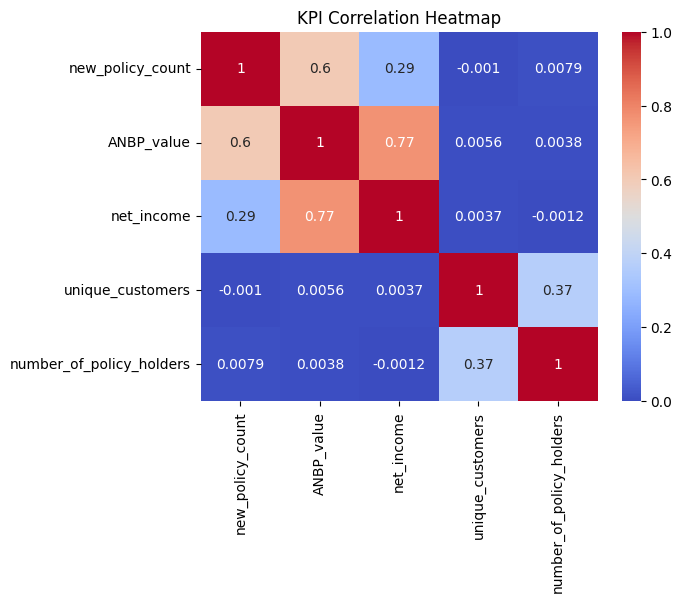

In [15]:
sns.heatmap(data_kpi[selected_kpis].corr(), annot=True, cmap="coolwarm")
plt.title("KPI Correlation Heatmap")
plt.show()

There is no strong correlation among the features

**Variance Check**

This is to make sure we are not including columns with very little variation because they won’t help differentiate agents.

In [16]:
data_kpi[selected_kpis].std().sort_values()


unique_customers                 4.555158
new_policy_count                 9.546853
number_of_policy_holders        24.659868
net_income                  173789.159480
ANBP_value                  806430.147563
dtype: float64

There is no columns with a near-zero standard derivation

**Data Preprocessing**

In [17]:
# Droped the column we don't want to scale
data_kpi_dropped = data_kpi.drop(columns=['train_flag'])

scaler = StandardScaler()
data_kpi_scaled = scaler.fit_transform(data_kpi_dropped)
data_kpi_scaled

array([[-2.12236171, -1.27030644, -0.77473899, -0.10871345, -0.03918304],
       [ 0.49638305,  0.05836788, -0.36336003,  0.33036275, -1.25577206],
       [ 0.60113284,  0.71530801,  1.14360434,  1.20851515,  2.15067721],
       ...,
       [ 1.43913117,  1.18527517,  1.27376032, -0.10871345,  1.17740599],
       [ 0.81063243,  1.81623581,  1.34919312, -0.54778965, -0.72858348],
       [ 0.70588264,  1.4410597 ,  2.16804964,  0.98897705,  0.36634664]])

# **Clustering**

### Clustering Algorithm Comparison and Evaluation

In this section, we apply and evaluate four different clustering algorithms—KMeans, Agglomerative Clustering, DBSCAN, and Gaussian Mixture Models—on the scaled KPI data. Each model is assessed using two metrics:
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters (higher is better).
- **Davies-Bouldin Index**: Measures intra-cluster similarity and inter-cluster differences (lower is better).

The data is projected into two principal components using PCA for visualization. Clusters are plotted in 2D space, and centroids (or approximate cluster centers) are highlighted. This comparison helps in identifying the most suitable clustering approach for our agent performance segmentation task.



KMeans



/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans: 0.238
Davies-Bouldin Score for KMeans: 1.398

Agglomerative Clustering

Silhouette Score for Agglomerative Clustering: 0.158
Davies-Bouldin Score for Agglomerative Clustering: 1.756

DBSCAN

Silhouette Score for DBSCAN: -0.154
Davies-Bouldin Score for DBSCAN: 1.363

Gaussian Mixture

Silhouette Score for Gaussian Mixture: 0.201
Davies-Bouldin Score for Gaussian Mixture: 1.533


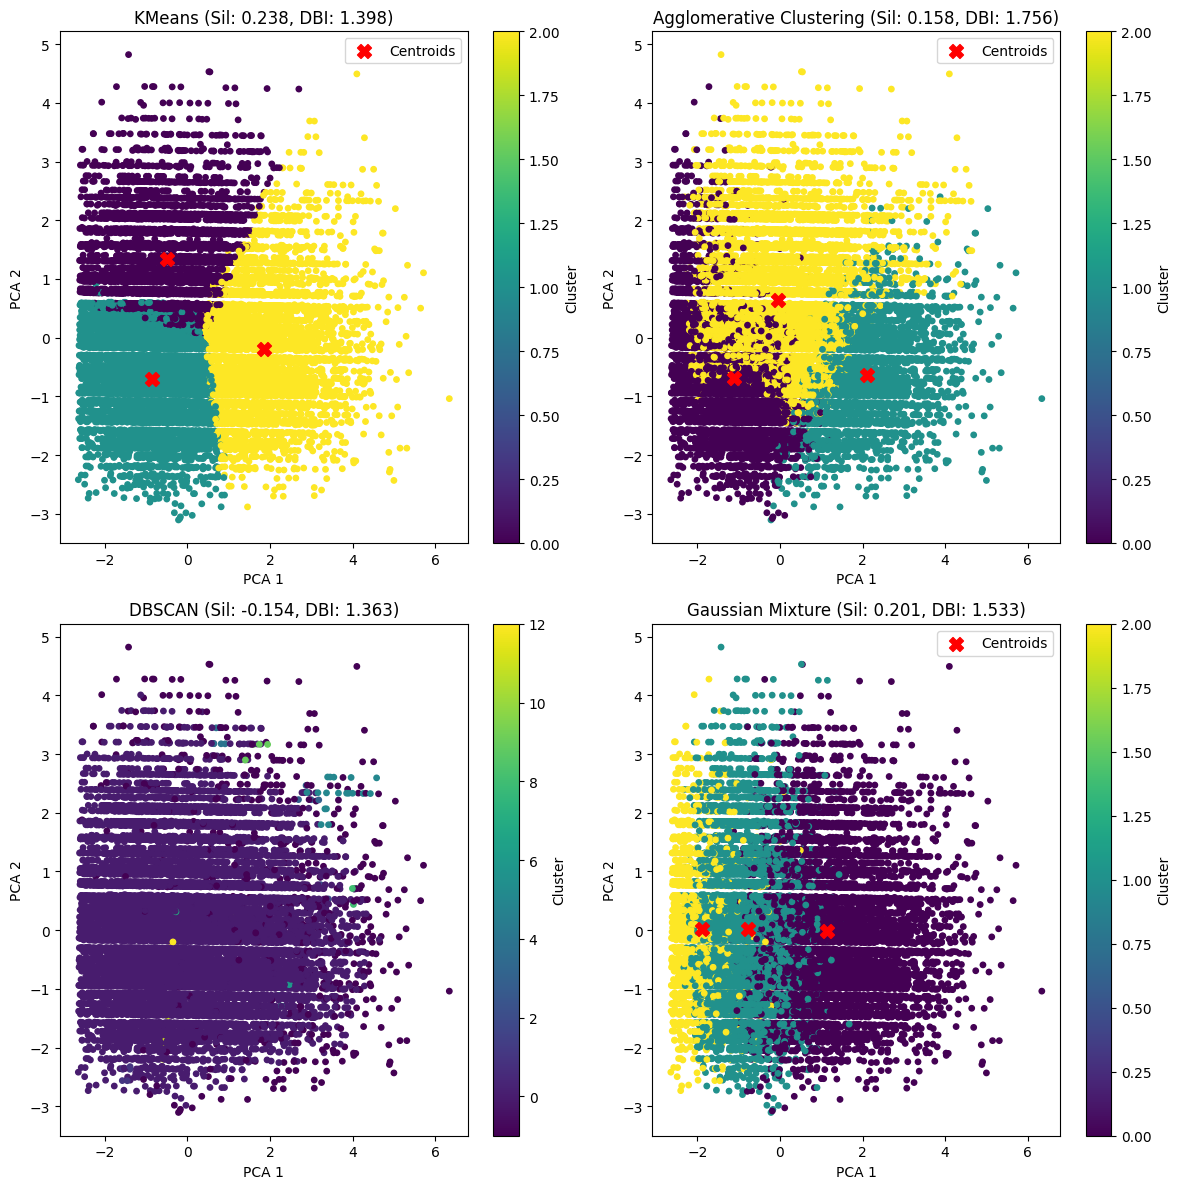

In [18]:
# List of clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),  # Adjust params as needed
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42)
}

# Setting up the plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterated through each model
for i, (name, model) in enumerate(clustering_algorithms.items()):
    print(f"\n{name}\n")
    
    # Fit the model and get the cluster labels
    if name == "Gaussian Mixture":
        model.fit(data_kpi_scaled)
        labels = model.predict(data_kpi_scaled)
    else:
        labels = model.fit_predict(data_kpi_scaled)
    
    # Calculated scores
    sil_score = silhouette_score(data_kpi_scaled, labels)
    db_score = davies_bouldin_score(data_kpi_scaled, labels)
    print(f"Silhouette Score for {name}: {sil_score:.3f}")
    print(f"Davies-Bouldin Score for {name}: {db_score:.3f}")
    
    # PCA transform
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_kpi_scaled)

    # Got cluster centers and transform to PCA space
    if hasattr(model, 'cluster_centers_'):
        centers = model.cluster_centers_
    elif name == "Gaussian Mixture":
        centers = model.means_
    else:
        # For Agglomerative and DBSCAN, used mean of points per cluster as pseudo-centroids
        centers = np.array([data_kpi_scaled[labels == k].mean(axis=0) for k in np.unique(labels) if k != -1])

    if name != "DBSCAN":  # DBSCAN may contain noise (-1) with no centroids
        centers_pca = pca.transform(centers)
    
    # Plot
    ax = axes[i]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=15)
    ax.set_title(f"{name} (Sil: {sil_score:.3f}, DBI: {db_score:.3f})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    plt.colorbar(scatter, ax=ax, label="Cluster")

    # Plot centroids
    if name != "DBSCAN":
        ax.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, marker='X', label='Centroids')
        ax.legend()

plt.tight_layout()
plt.show()


| Algorithm                | Silhouette Score ↑ | Davies-Bouldin Score ↓ |
| ------------------------ | ------------------ | ---------------------- |
| **KMeans**               | **0.238**          | **1.398**              |
| Agglomerative Clustering | 0.158              | 1.756                  |
| DBSCAN                   | -0.154             | 1.363                  |
| Gaussian Mixture         | 0.200              | 1.533                  |


Based on the comparison, **KMeans** demonstrates the most favorable performance on this dataset. It yields the highest Silhouette Score and the lowest Davies-Bouldin Index among the evaluated algorithms.


# **K-Means Clustering**

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_kpi_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_kpis)
cluster_centers['cluster'] = cluster_centers.index
display(cluster_centers)

,new_policy_count,ANBP_value,net_income,unique_customers,number_of_policy_holders,cluster
0,18.858369,7.402871e+05,164808.681048,19.227016,57.280099,0
1,16.532734,5.605705e+05,141396.521522,13.454671,17.206920,1
2,27.514880,2.032856e+06,425953.706127,15.106127,27.228665,2


According to the above results of k-Means,

* **Low performance** - **Cluster 1**
* **Mid performance** - **Cluster 0**
* **High performance** - **Cluster 2**


**Cluster Mapping**

In [21]:
def mapping(data):
    
    # Mapped clusters to human-readable labels
    cluster_map = {0: "Mid", 1: "Low", 2: "High"}
    
    data['performance_cluster'] = kmeans_labels
    data["performance_level"] = data["performance_cluster"].map(cluster_map)
    return data


In [22]:
all_data = mapping(all_data)
data_kpi = mapping(data_kpi)

In [23]:
all_data.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,train_flag,performance_cluster,performance_level
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,8,15,0,0,93313,30,162,1,1,Low
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,10,17,25,1071450,164804,0,175,1,1,Low
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,11,21,26,1601210,426690,84,78,1,0,Mid
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,9,13,18,283230,47793,39,144,1,1,Low
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,6,19,20,1957680,562239,19,40,1,2,High


In [24]:
data_kpi.head()

,new_policy_count,ANBP_value,net_income,unique_customers,number_of_policy_holders,train_flag,performance_cluster,performance_level
0,0,0,93313,15,30,1,1,Low
1,25,1071450,164804,17,0,1,1,Low
2,26,1601210,426690,21,84,1,0,Mid
3,18,283230,47793,13,39,1,1,Low
4,20,1957680,562239,19,19,1,2,High


# **Cluster visualization and Analysis**

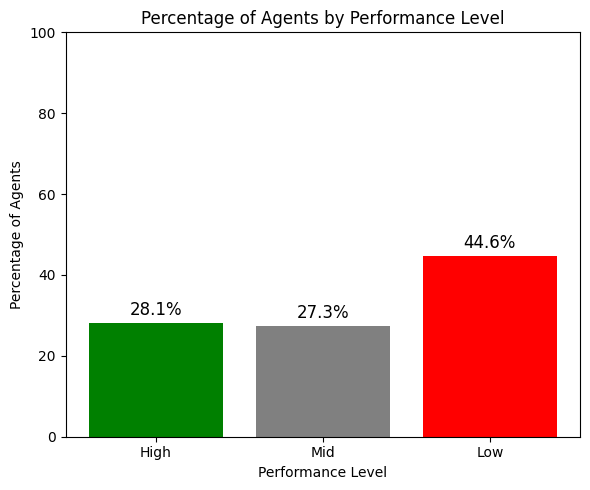

In [25]:
# Counted the number of agents in each performance level
level_counts = all_data['performance_level'].value_counts().reindex(['High', 'Mid', 'Low'], fill_value=0)

# Calculated percentages
total_agents = level_counts.sum()
level_percentages = (level_counts / total_agents) * 100

# Plot the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(level_percentages.index, level_percentages.values, color=['green', 'gray', 'red'])

# Annotated bars with percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=12)

# Formatting
plt.title('Percentage of Agents by Performance Level')
plt.ylabel('Percentage of Agents')
plt.xlabel('Performance Level')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


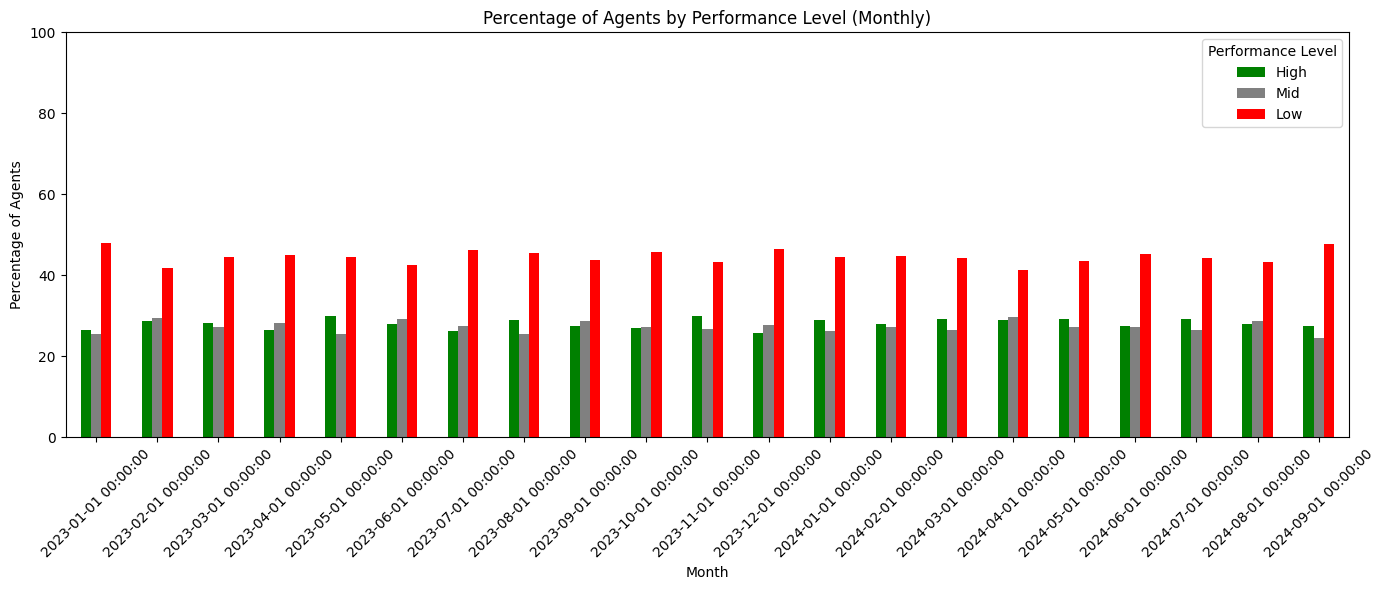

In [26]:
# Converted 'year_month' to datetime format
all_data['year_month'] = pd.to_datetime(all_data['year_month'])

# Count the number of agents in each performance level per month
monthly_level_counts = all_data.groupby(['year_month', 'performance_level']).size().unstack(fill_value=0)

# Sort by 'year_month' to ensure chronological order
monthly_level_counts = monthly_level_counts.sort_index()

# Calculate total agents per month
monthly_level_counts['Total'] = monthly_level_counts.sum(axis=1)

# Calculate percentage of agents per performance level for each month
monthly_percentage = (monthly_level_counts[['High', 'Mid', 'Low']].div(monthly_level_counts['Total'], axis=0)) * 100

# Plot the bar chart for each month
monthly_percentage.plot(kind='bar', stacked=False, figsize=(14, 6), color=['green', 'gray', 'red'])

# Formatting
plt.title('Percentage of Agents by Performance Level (Monthly)')
plt.ylabel('Percentage of Agents')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.legend(title="Performance Level")
plt.show()


In [27]:
data_kpi.groupby('performance_level').mean()

,new_policy_count,ANBP_value,net_income,unique_customers,number_of_policy_holders,train_flag,performance_cluster
performance_level,,,,,,,
High,27.518397,2.033208e+06,426054.838590,15.10403,27.207403,0.944809,2.0
Low,16.534559,5.606279e+05,141377.475256,13.45922,17.227122,0.939591,1.0
Mid,18.864315,7.413645e+05,165019.286974,19.22976,57.323383,0.949118,0.0


# **Tracking Progress Over Time**

**Monitoring monthly KPIs**

In [28]:
monthly_performance = all_data.groupby(['year_month', 'performance_level']).agg({
    'new_policy_count': 'mean',
    'ANBP_value': 'mean',
    'net_income': 'mean',
    'unique_customers': 'mean',
    'number_of_policy_holders': 'mean'
}).reset_index()
monthly_performance

,year_month,performance_level,new_policy_count,ANBP_value,net_income,unique_customers,number_of_policy_holders
0,2023-01-01,High,27.261628,2.033455e+06,439683.720930,15.261628,27.872093
1,2023-01-01,Low,16.141026,5.810012e+05,147125.282051,13.762821,15.782051
2,2023-01-01,Mid,19.048193,7.872809e+05,182907.066265,19.289157,57.445783
3,2023-02-01,High,27.460317,1.949439e+06,410532.788360,14.677249,29.243386
4,2023-02-01,Low,17.318841,5.578271e+05,135941.561594,13.264493,18.079710
...,...,...,...,...,...,...,...
58,2024-08-01,Low,16.548469,5.254747e+05,136089.326531,13.428571,17.224490
59,2024-08-01,Mid,19.343629,7.616611e+05,164194.640927,19.308880,57.702703
60,2024-09-01,High,27.773810,2.071151e+06,430379.309524,15.646825,29.702381
61,2024-09-01,Low,16.331808,5.638843e+05,144705.279176,13.379863,17.315789


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

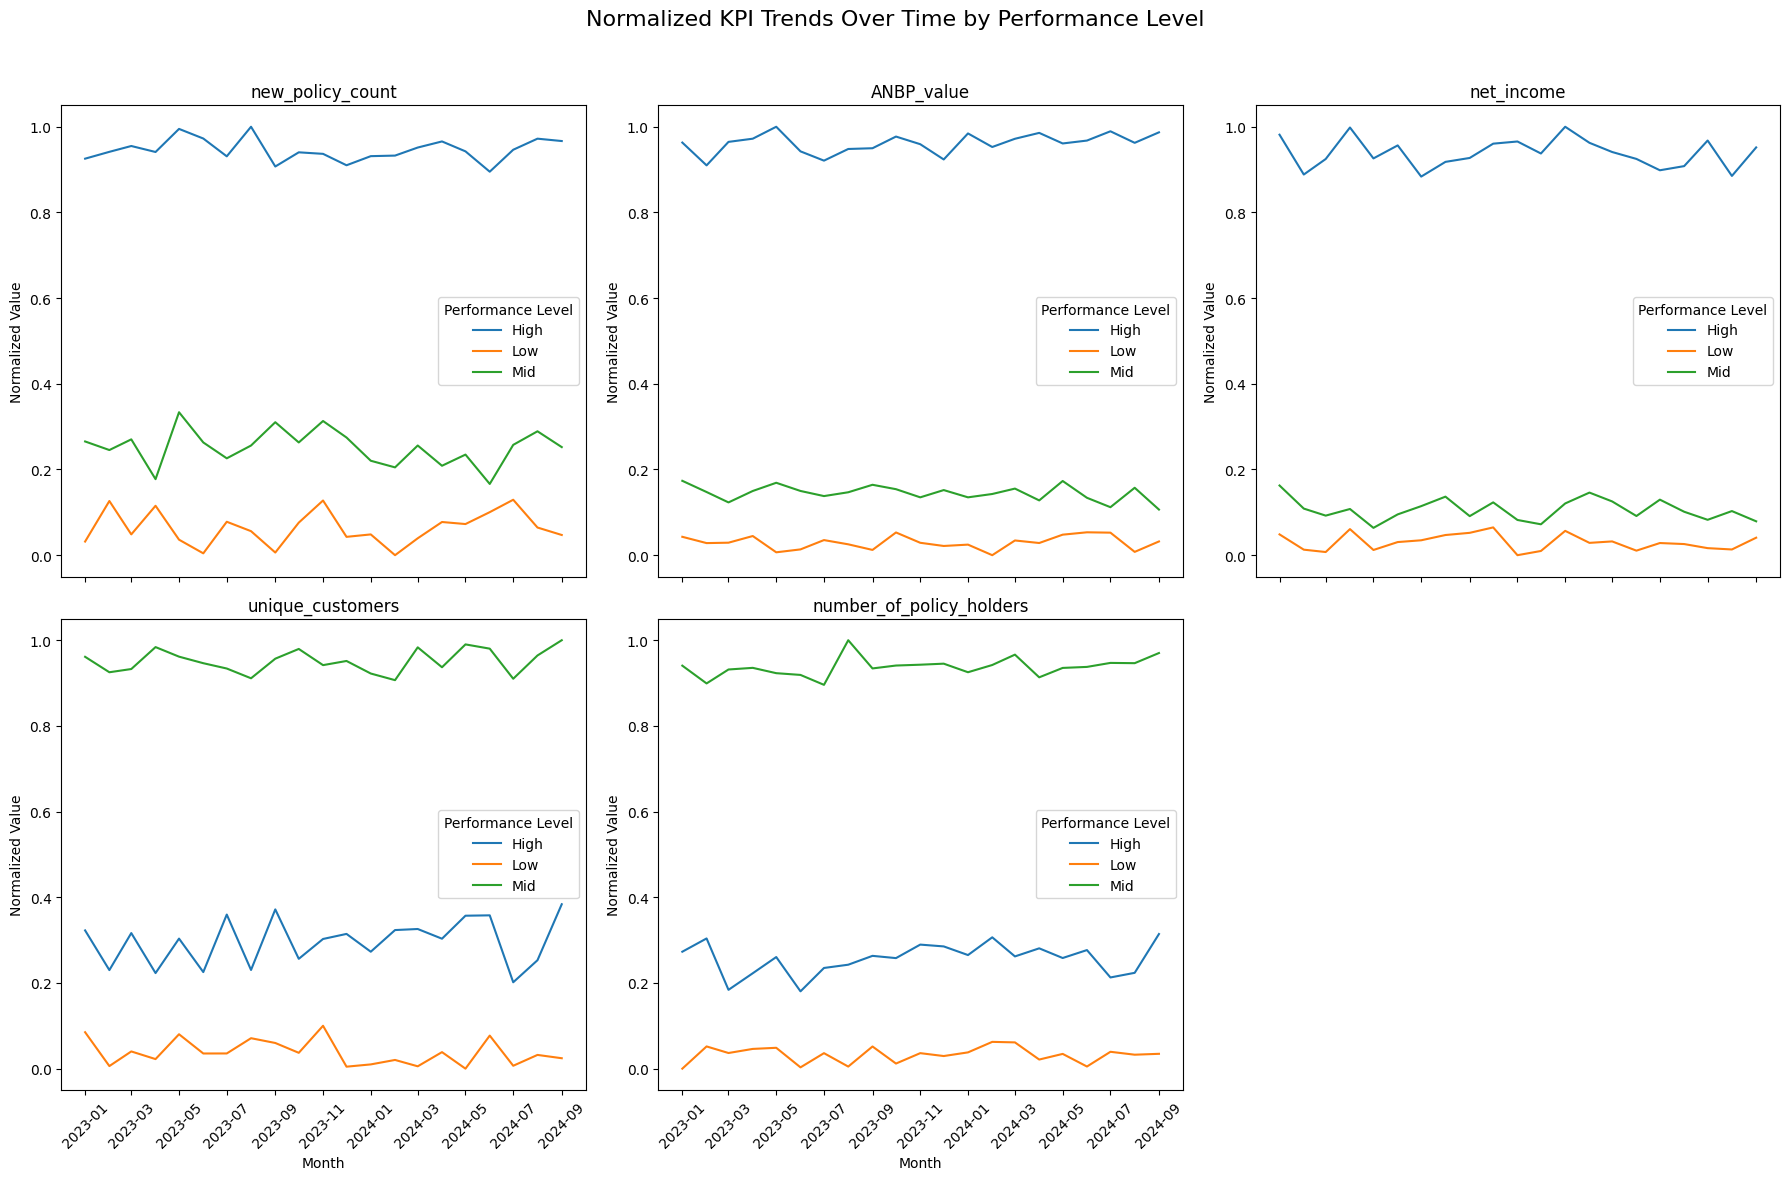

In [29]:
# KPIs to track
kpis = ['new_policy_count', 'ANBP_value', 'net_income', 'unique_customers', 'number_of_policy_holders']

# Normalized the KPIs
normalized_df = monthly_performance.copy()
normalized_df[kpis] = normalized_df[kpis].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

melted = normalized_df.melt(
    id_vars=['year_month', 'performance_level'],
    value_vars=kpis,
    var_name='KPI',
    value_name='Normalized Value'
)

# Plot setup
num_kpis = len(kpis)
cols = 3
rows = (num_kpis + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for i, kpi in enumerate(kpis):
    ax = axes[i]
    subset = melted[melted['KPI'] == kpi]
    sns.lineplot(data=subset, x='year_month', y='Normalized Value', hue='performance_level', ax=ax)
    ax.set_title(kpi)
    ax.set_xlabel("Month")
    ax.set_ylabel("Normalized Value")
    ax.legend(title='Performance Level')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Normalized KPI Trends Over Time by Performance Level", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


* Agents categorized as high performers tend to exhibit higher values in `new_policy_count`, `ANBP_value`, and `net_income`, indicating stronger business acquisition and revenue generation.
* Mid-level performers generally have higher counts of `unique_customers` and `number_of_policy_holders`, suggesting a broader customer base and policy engagement without necessarily high revenue metrics.
* Agents classified as low performers generally exhibit lower values across all key performance indicators, indicating potential areas for improvement in both customer engagement and revenue generation.



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


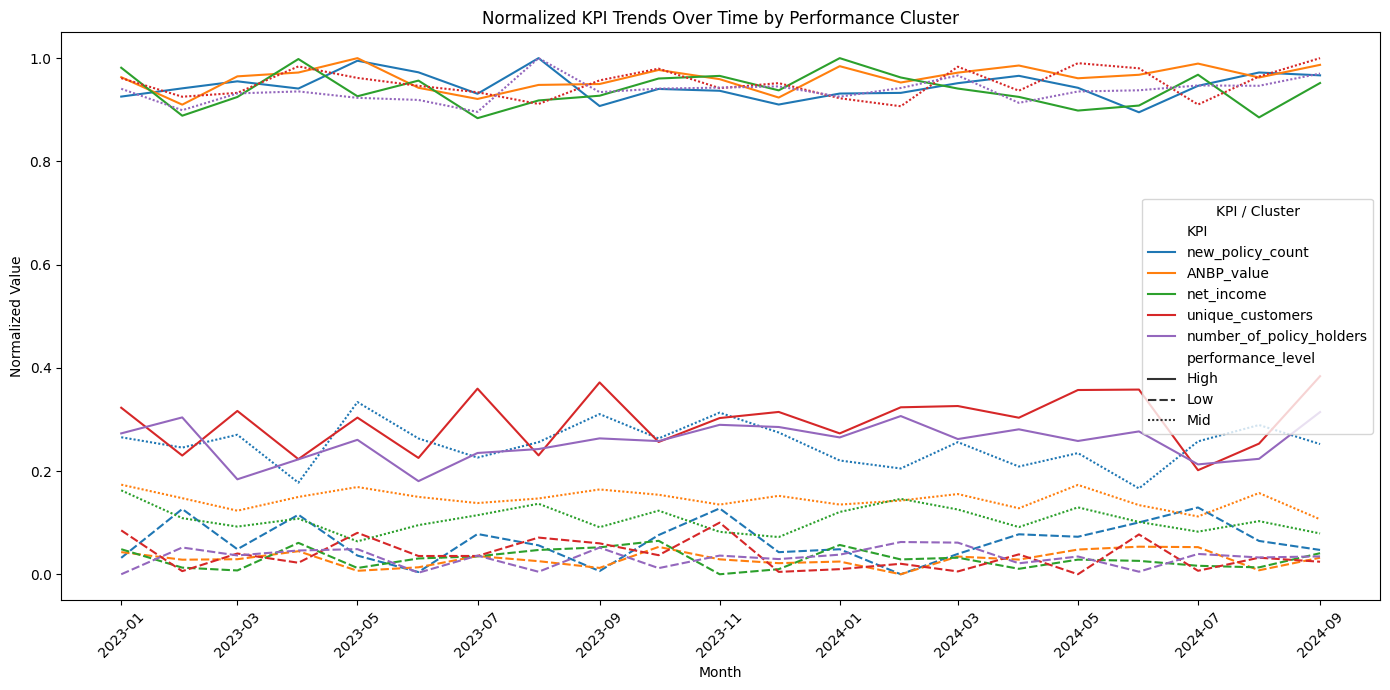

In [30]:
normalized_df = monthly_performance.copy()
normalized_df[kpis] = normalized_df[kpis].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

melted = normalized_df.melt(
    id_vars=['year_month', 'performance_level'],
    value_vars=kpis,
    var_name='KPI',
    value_name='Normalized Value'
)

# Plot all KPIs in one graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=melted, x='year_month', y='Normalized Value', hue='KPI', style='performance_level')
plt.title('Normalized KPI Trends Over Time by Performance Cluster')
plt.xlabel('Month')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.legend(title='KPI / Cluster')
plt.tight_layout()
plt.show()


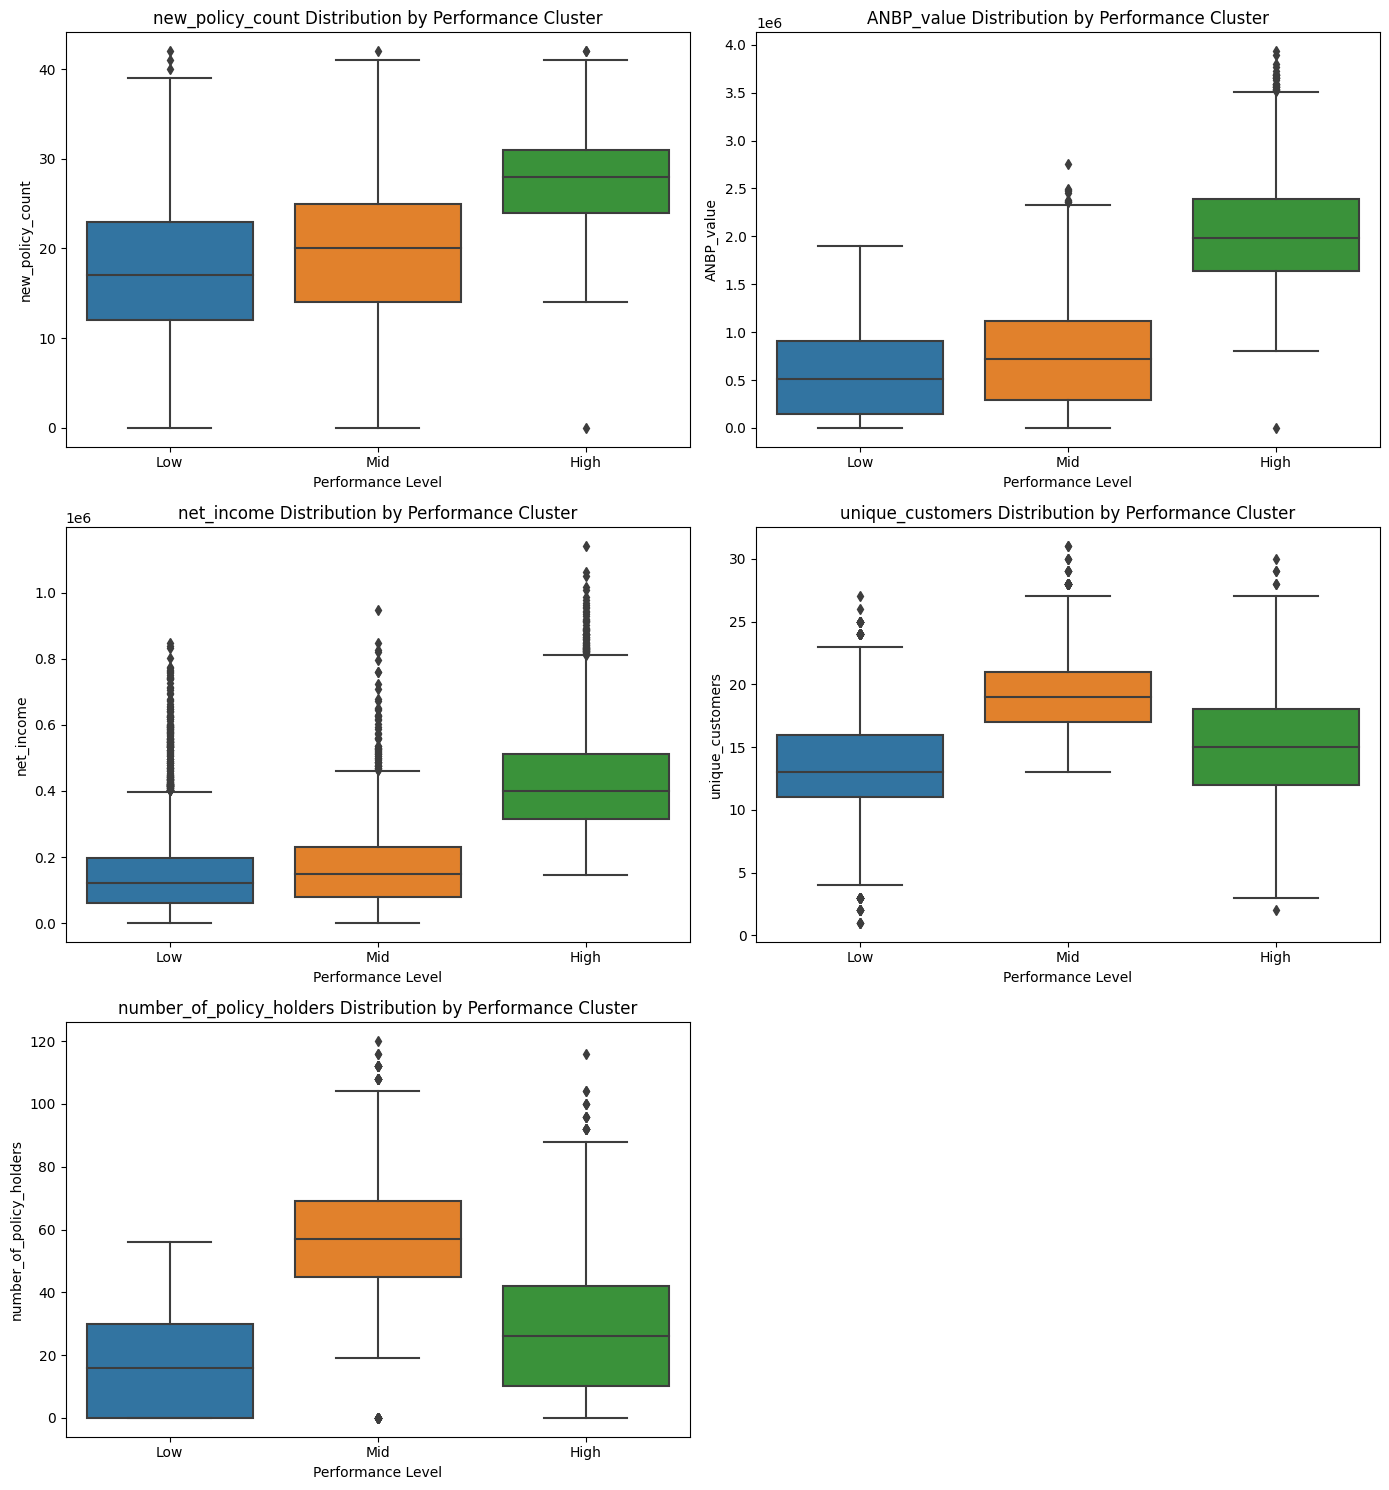

In [31]:
# Set up the subplot grid
n_kpis = len(kpis)
cols = 2
rows = (n_kpis + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Plot each KPI in its subplot
for i, kpi in enumerate(kpis):
    sns.boxplot(data=all_data, x='performance_level', y=kpi, ax=axes[i])
    axes[i].set_title(f'{kpi} Distribution by Performance Cluster')
    axes[i].set_xlabel('Performance Level')
    axes[i].set_ylabel(kpi)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Agent Performance Trends Analysis (Historical vs Current Data)

This section analyzes trends in agent performance by comparing historical and current data. The objective is to understand how agent performance levels (High, Mid, Low) have evolved over time, identify consistent patterns and detect any shifts in behavior or outcomes.

In [32]:
df_sorted = all_data.sort_values(by=['agent_code', 'year_month'])

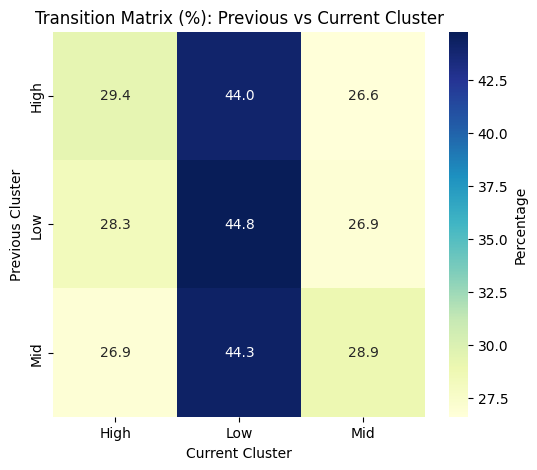

In [33]:
df_sorted['previous_level'] = df_sorted.groupby('agent_code')['performance_level'].shift(1)

# Created the raw transition matrix
transition_matrix = pd.crosstab(df_sorted['previous_level'], df_sorted['performance_level'])

# Normalize by row (previous cluster) to get row-wise percentages
transition_percent = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100

# Plot as heatmap with percentages
plt.figure(figsize=(6, 5))
sns.heatmap(transition_percent, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title("Transition Matrix (%): Previous vs Current Cluster")
plt.xlabel("Current Cluster")
plt.ylabel("Previous Cluster")
plt.show()


/tmp/ipykernel_31/4070932758.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=transition_percent.applymap(lambda v: f"{v:.1f}%"),


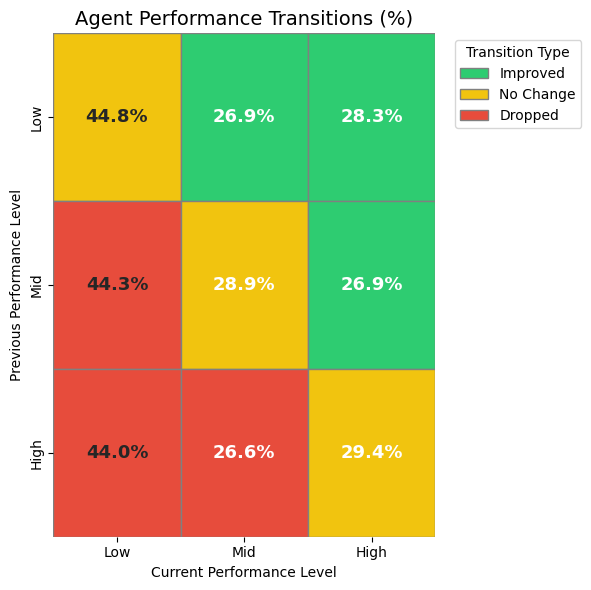

In [34]:
# Step 1: Generate the transition matrix (counts)
transition_matrix = pd.crosstab(df_sorted['previous_level'], df_sorted['performance_level'])

# Step 2: Normalize row-wise to get percentages
transition_percent = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100

# Step 3: Ensure order of levels
order = ['Low', 'Mid', 'High']
transition_percent = transition_percent.reindex(index=order, columns=order)

# Step 4: Build color matrix based on movement direction
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}
color_matrix = np.zeros_like(transition_percent.values, dtype=int)

for i, row_label in enumerate(order):
    for j, col_label in enumerate(order):
        color_matrix[i, j] = np.sign(level_to_index[col_label] - level_to_index[row_label])

# Step 5: Map direction values to color hex codes
cmap_dict = {-1: "#e74c3c", 0: "#f1c40f", 1: "#2ecc71"}  # red, yellow, green
custom_colors = np.vectorize(cmap_dict.get)(color_matrix)

# Step 6: Plot base heatmap with transparent facecolors
fig, ax = plt.subplots(figsize=(6.5, 6))

sns.heatmap(
    transition_percent,
    annot=transition_percent.applymap(lambda v: f"{v:.1f}%"),
    fmt='',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    xticklabels=order,
    yticklabels=order,
    ax=ax,
    annot_kws={"size": 13, "weight": "bold"},
    mask=np.full_like(transition_percent, False, dtype=bool)
)

# Step 7: Overlay custom color patches
for i in range(color_matrix.shape[0]):
    for j in range(color_matrix.shape[1]):
        rect = plt.Rectangle((j, i), 1, 1, facecolor=cmap_dict[color_matrix[i, j]], edgecolor='gray')
        ax.add_patch(rect)

# Step 8: Add legend
legend_elements = [
    Patch(facecolor="#2ecc71", edgecolor='gray', label='Improved'),
    Patch(facecolor="#f1c40f", edgecolor='gray', label='No Change'),
    Patch(facecolor="#e74c3c", edgecolor='gray', label='Dropped')
]
ax.legend(handles=legend_elements, title='Transition Type', loc='upper right', bbox_to_anchor=(1.4, 1))

# Step 9: Labels and title
ax.set_title("Agent Performance Transitions (%)", fontsize=14)
ax.set_xlabel("Current Performance Level")
ax.set_ylabel("Previous Performance Level")
plt.tight_layout()
plt.show()


### Performance Transition Insights

- A significant proportion of agents who were previously low performers have remained in the low performance category.
- There is also a notable number of agents who transitioned from mid to low performance over time.
- In contrast, only a small fraction of past low performers have improved to reach high performance levels.

These patterns suggest that once agents fall into the low-performing category, it is challenging for them to recover without targeted support or intervention.


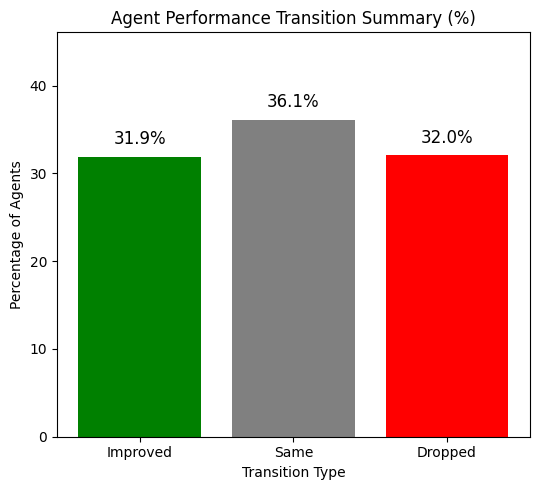

In [35]:
# Define order for performance levels
order = ['Low', 'Mid', 'High']
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}

# Map levels to index values
df_sorted['previous_index'] = df_sorted['previous_level'].map(level_to_index)
df_sorted['current_index'] = df_sorted['performance_level'].map(level_to_index)

# Compute transition direction: +1 (improve), -1 (drop), 0 (same)
df_sorted['transition_direction'] = df_sorted['current_index'] - df_sorted['previous_index']

# Filter only rows where we have a previous cluster
transitions = df_sorted.dropna(subset=['previous_level'])

# Count transitions
transition_counts = transitions['transition_direction'].value_counts().to_dict()
improved = transition_counts.get(1, 0) + transition_counts.get(2, 0)
same = transition_counts.get(0, 0)
dropped = transition_counts.get(-1, 0) + transition_counts.get(-2, 0)

# Total agents considered
total_agents = improved + same + dropped

# Data for plotting in percentages
transition_summary_pct = {
    'Improved': (improved / total_agents) * 100,
    'Same': (same / total_agents) * 100,
    'Dropped': (dropped / total_agents) * 100
}

plt.figure(figsize=(5.5, 5))
bars = plt.bar(transition_summary_pct.keys(), transition_summary_pct.values(), color=['green', 'gray', 'red'])

# Annotated bars with %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=12)

# Formatting
plt.title("Agent Performance Transition Summary (%)")
plt.ylabel("Percentage of Agents")
plt.xlabel("Transition Type")
plt.ylim(0, max(transition_summary_pct.values()) + 10)
plt.tight_layout()
plt.show()


### Overall Performance Transition Insights

- A significant portion of agents in the overall dataset show no change in their performance level, indicating stability or stagnation in performance.
- The number of agents who have improved is notably smaller than those who have dropped in performance, highlighting that a larger proportion of agents are facing challenges in maintaining or improving their performance.


# Monthly Performance Tracking

In [36]:
# Sort by agent and time
df_sorted = df_sorted.sort_values(by=['agent_code', 'year_month'])

# Create shifted previous cluster column
df_sorted['previous_cluster'] = df_sorted.groupby('agent_code')['performance_cluster'].shift(1)

# Define movement status
def categorize_movement(row):
    if pd.isna(row['previous_cluster']):
        return 'First Month'
    elif row['performance_cluster'] > row['previous_cluster']:
        return 'Improved'
    elif row['performance_cluster'] < row['previous_cluster']:
        return 'Dropped'
    else:
        return 'Same'

df_sorted['movement'] = df_sorted.apply(categorize_movement, axis=1)


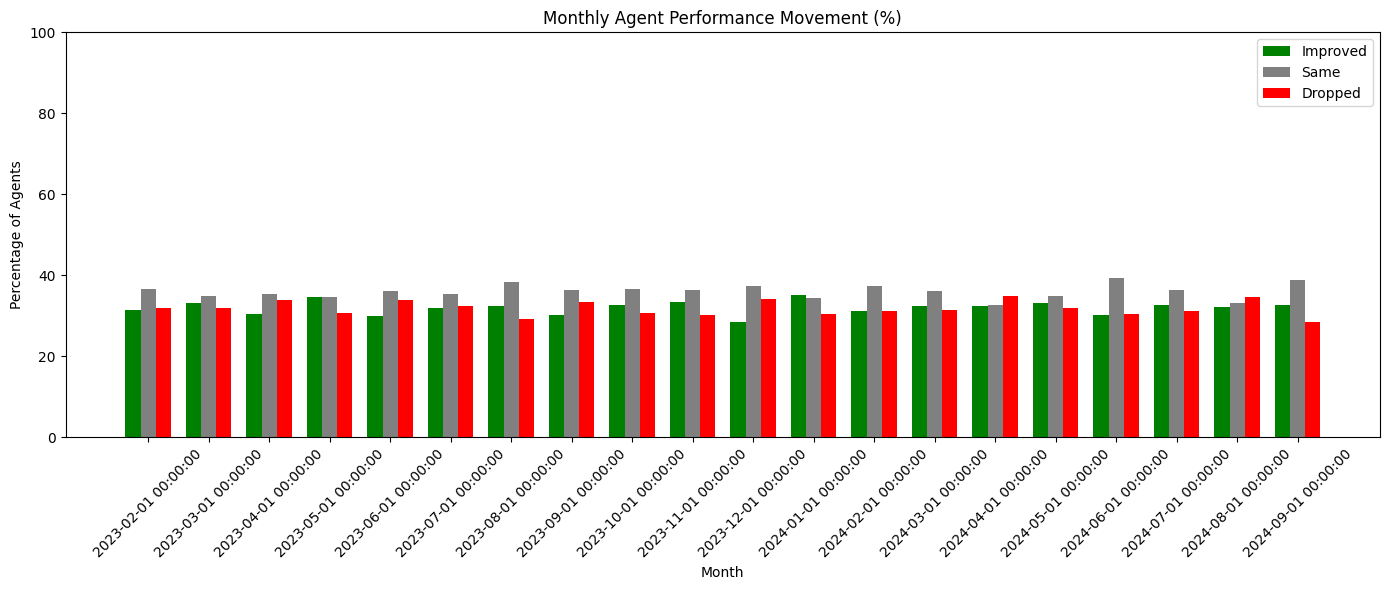

In [37]:
# Group again to ensure consistency
monthly_transitions = df_sorted[df_sorted['movement'] != 'First Month'] \
    .groupby(['year_month', 'movement']) \
    .size().unstack(fill_value=0)

# Sort months
monthly_transitions = monthly_transitions.sort_index()

# Convert counts to percentages row-wise
monthly_transitions_pct = monthly_transitions.div(monthly_transitions.sum(axis=1), axis=0) * 100

# Extract values
months = monthly_transitions_pct.index.tolist()
categories = ['Improved', 'Same', 'Dropped']
values = [monthly_transitions_pct.get(col, pd.Series([0]*len(months))) for col in categories]

# Set positions
x = np.arange(len(months))  # label locations
width = 0.25                # width of the bars

# Create figure and plot
fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, values[0], width, label='Improved', color='green')
bars2 = ax.bar(x, values[1], width, label='Same', color='gray')
bars3 = ax.bar(x + width, values[2], width, label='Dropped', color='red')

# Set labels and formatting
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Agents')
ax.set_title('Monthly Agent Performance Movement (%)')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.show()


* Across each month, the majority of agents remained in the same performance level.
* It indicates a **high degree of consistency or lack of movement in performance classifications over time.**


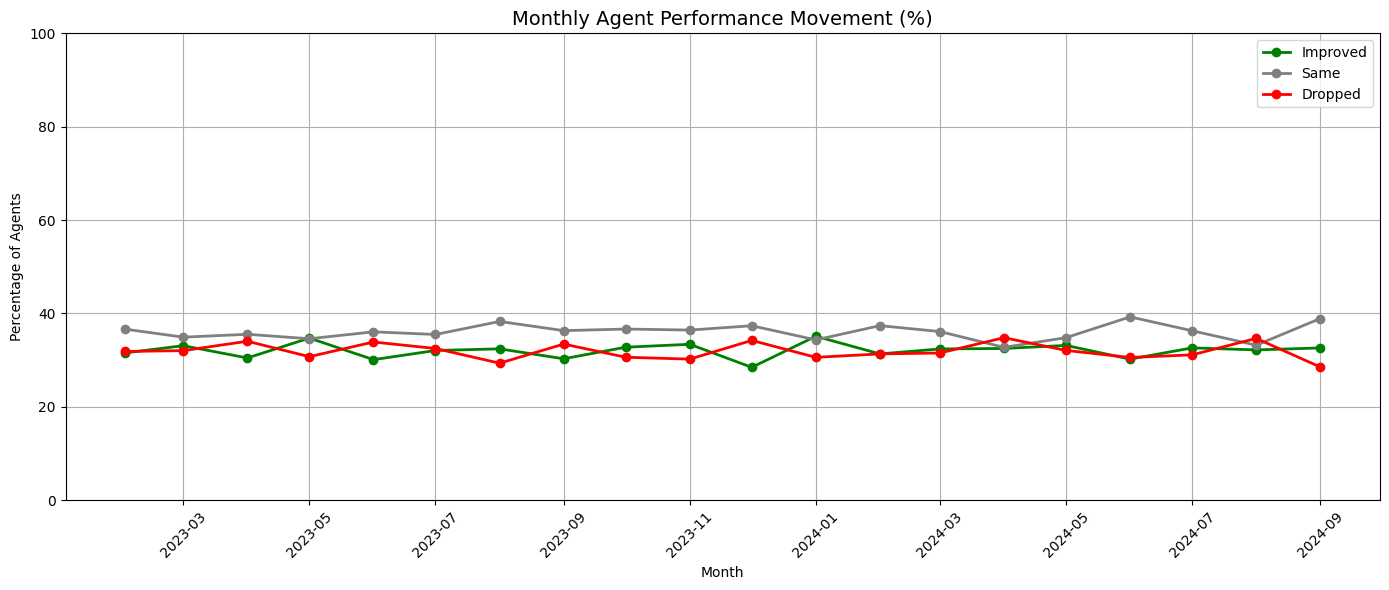

In [38]:
# Group and normalize to get monthly transition percentages
monthly_transitions = df_sorted[df_sorted['movement'] != 'First Month'] \
    .groupby(['year_month', 'movement']) \
    .size().unstack(fill_value=0)

monthly_transitions = monthly_transitions.sort_index()
monthly_transitions_pct = monthly_transitions.div(monthly_transitions.sum(axis=1), axis=0) * 100

# Plot line chart
plt.figure(figsize=(14, 6))

for category, color in zip(['Improved', 'Same', 'Dropped'], ['green', 'gray', 'red']):
    if category in monthly_transitions_pct.columns:
        plt.plot(monthly_transitions_pct.index, monthly_transitions_pct[category], 
                 label=category, color=color, linewidth=2, marker='o')

plt.title("Monthly Agent Performance Movement (%)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Percentage of Agents")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/22386978.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
/tmp/ipykernel_31/22386978.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(monthly_counts.index.astype(str), rotation=45)


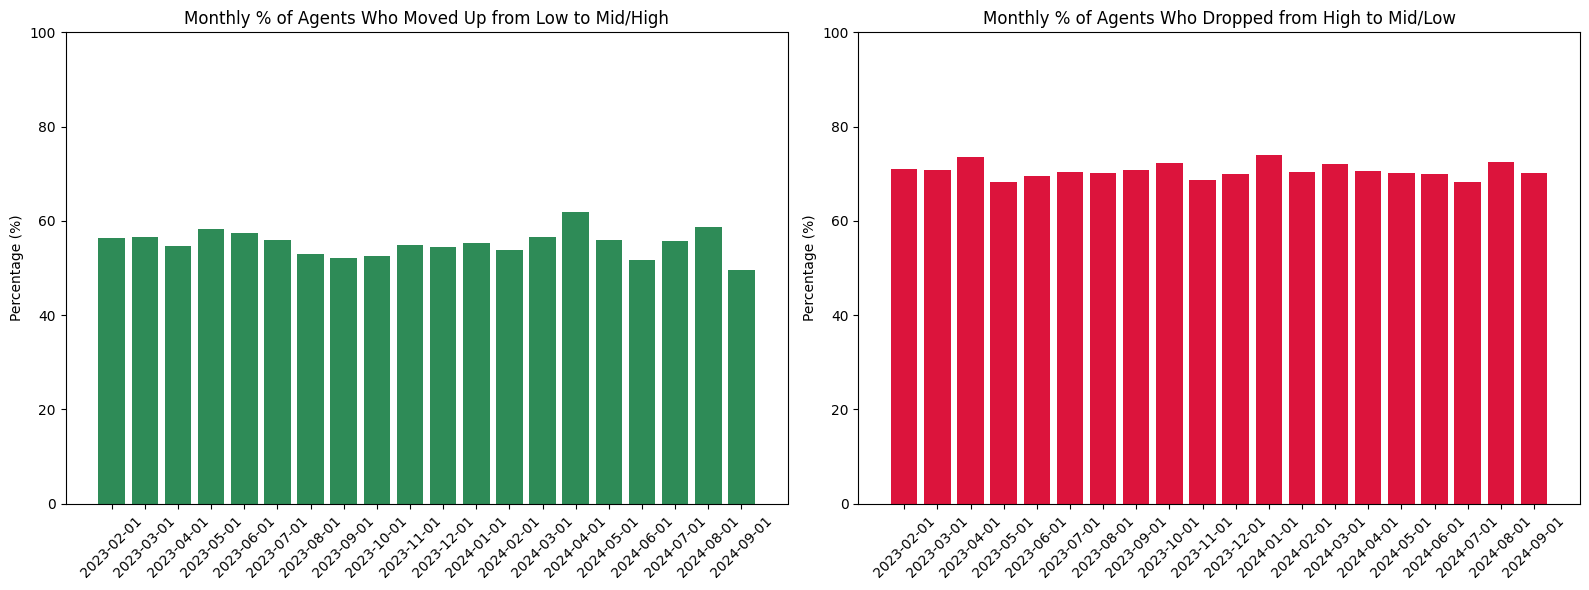

In [39]:
# Filter out 'First Month' entries
movement_data = df_sorted[df_sorted['movement'] != 'First Month']

# Group by month and movement type
monthly_counts = movement_data.groupby(['year_month', 'movement']).size().unstack(fill_value=0)

# Calculate total agents each month
monthly_counts['Total'] = monthly_counts.sum(axis=1)

# Calculate percentage of agents who stayed in the same cluster
monthly_counts['Same_pct'] = (monthly_counts['Same'] / monthly_counts['Total']) * 100

# Filter rows where the previous level was 'Low'
low_prev = df_sorted[df_sorted['previous_level'] == 'Low']

# Among them, find those who moved to Mid or High
low_to_up = low_prev[low_prev['performance_level'].isin(['Mid', 'High'])]

# Count per month
monthly_low_total = low_prev.groupby('year_month')['agent_code'].nunique()
monthly_low_to_up = low_to_up.groupby('year_month')['agent_code'].nunique()

# Compute percentage
monthly_percentage = (monthly_low_to_up / monthly_low_total * 100).fillna(0)
monthly_percentage = monthly_percentage.sort_index()

# Filter rows where the previous level was 'High'
high_prev = df_sorted[df_sorted['previous_level'] == 'High']

# From those, find agents who dropped to Mid or Low
high_to_down = high_prev[high_prev['performance_level'].isin(['Mid', 'Low'])]

# Count per month
monthly_high_total = high_prev.groupby('year_month')['agent_code'].nunique()
monthly_high_to_down = high_to_down.groupby('year_month')['agent_code'].nunique()

# Compute percentage
monthly_high_drop_pct = (monthly_high_to_down / monthly_high_total * 100).fillna(0)
monthly_high_drop_pct = monthly_high_drop_pct.sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low → Up (Mid/High)
axes[0].bar(monthly_counts.index.astype(str), monthly_percentage.values, color='seagreen')
axes[0].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('Monthly % of Agents Who Moved Up from Low to Mid/High')
axes[0].set_ylim(0, 100)

# Plot for High → Down (Mid/Low)
axes[1].bar(monthly_counts.index.astype(str), monthly_high_drop_pct.values, color='crimson')
axes[1].set_xticklabels(monthly_counts.index.astype(str), rotation=45)
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Monthly % of Agents Who Dropped from High to Mid/Low')
axes[1].set_ylim(0, 100)

# Layout adjustments
plt.tight_layout()
plt.show()


* For each month, the percentage of agents who experienced a drop in their performance level is consistently higher than the percentage of agents who showed improvement.
* This trend highlights the need for targeted interventions to prevent performance decline.


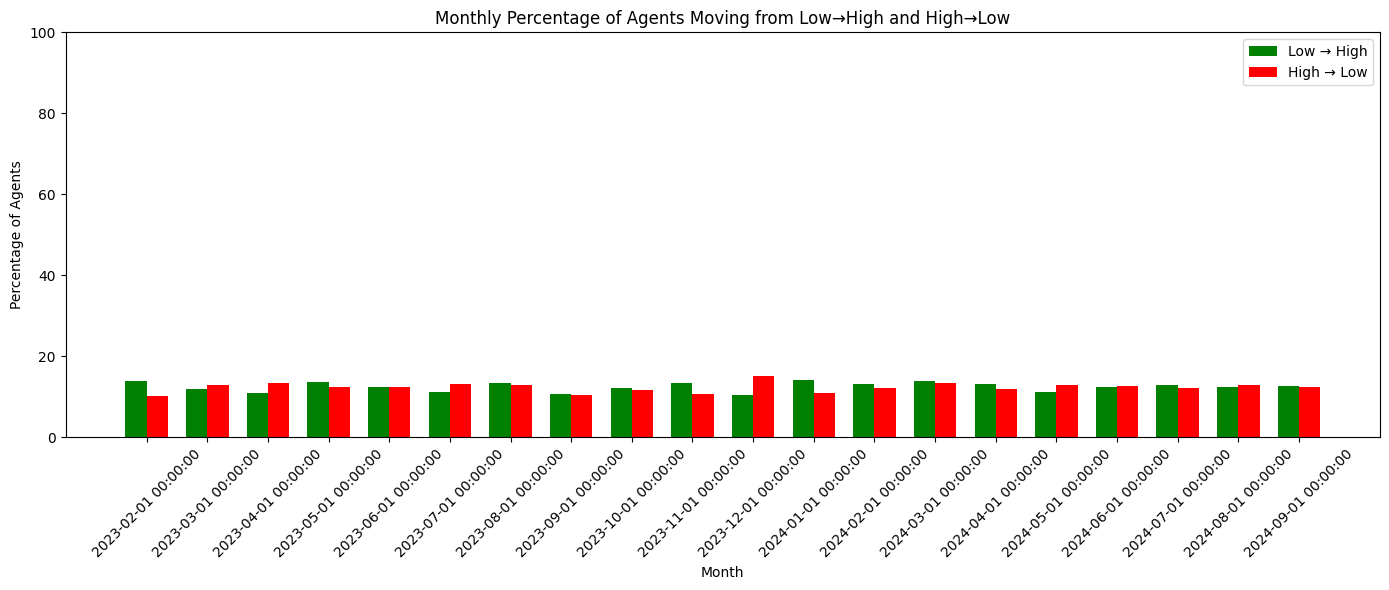

In [40]:
# Filtered out "First Month" entries
df_trans = df_sorted[df_sorted['movement'] != 'First Month'].copy()

# Define level order
order = ['Low', 'Mid', 'High']
level_to_index = {'Low': 0, 'Mid': 1, 'High': 2}

# Convert levels to numeric indices
df_trans['prev_index'] = df_trans['previous_level'].map(level_to_index)
df_trans['curr_index'] = df_trans['performance_level'].map(level_to_index)

# Calculate movement direction
df_trans['level_shift'] = df_trans['curr_index'] - df_trans['prev_index']

# Add a "shift_type" label
df_trans['shift_type'] = df_trans.apply(
    lambda row: 'Low→High' if row['previous_level'] == 'Low' and row['performance_level'] == 'High'
    else ('High→Low' if row['previous_level'] == 'High' and row['performance_level'] == 'Low' else None),
    axis=1
)

# Group by month and shift type
shift_counts = df_trans[df_trans['shift_type'].notnull()] \
    .groupby(['year_month', 'shift_type']) \
    .size().unstack(fill_value=0)

# Compute total transitions per month
monthly_totals = df_trans.groupby('year_month').size()

# Calculate percentage
shift_pct = (shift_counts.T / monthly_totals).T * 100

# Ensure all months are present
all_months = sorted(df_trans['year_month'].unique())
low_to_high = shift_pct.get('Low→High', pd.Series([0]*len(all_months), index=all_months))
high_to_low = shift_pct.get('High→Low', pd.Series([0]*len(all_months), index=all_months))

# Bar chart positions
x = np.arange(len(all_months))
width = 0.35

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, low_to_high.values, width, label='Low → High', color='green')
plt.bar(x + width/2, high_to_low.values, width, label='High → Low', color='red')

plt.xticks(x, all_months, rotation=45)
plt.ylabel("Percentage of Agents")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Moving from Low→High and High→Low")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()


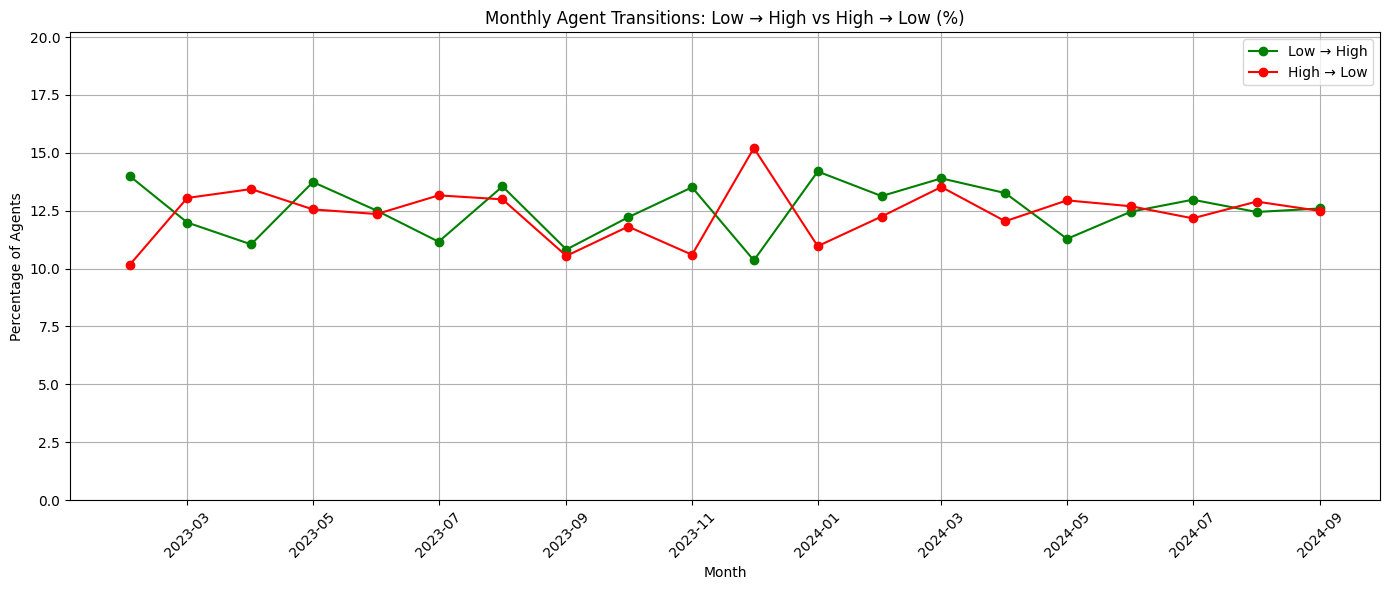

In [41]:
# Ensure all months are sorted
all_months = sorted(df_trans['year_month'].unique())

# Use same shift_pct as before
low_to_high = shift_pct.get('Low→High', pd.Series([0]*len(all_months), index=all_months))
high_to_low = shift_pct.get('High→Low', pd.Series([0]*len(all_months), index=all_months))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(all_months, low_to_high.values, marker='o', color='green', label='Low → High')
plt.plot(all_months, high_to_low.values, marker='o', color='red', label='High → Low')

plt.xticks(rotation=45)
plt.ylabel("Percentage of Agents")
plt.xlabel("Month")
plt.title("Monthly Agent Transitions: Low → High vs High → Low (%)")
plt.ylim(0, max(low_to_high.max(), high_to_low.max()) + 5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Performance Transition Highlights

* A common pattern observed in many agents’ first active months is a transition from high to low performance levels.
* Notably, in December 2023, there was a significant drop in performance from high to low.
* However, this trend reversed as the new year began—transitioning from December 2023 to January 2024, a considerable number of agents showed a marked improvement, moving from low to high performance levels.


**Analysis of agents who stayed in the same performance level**

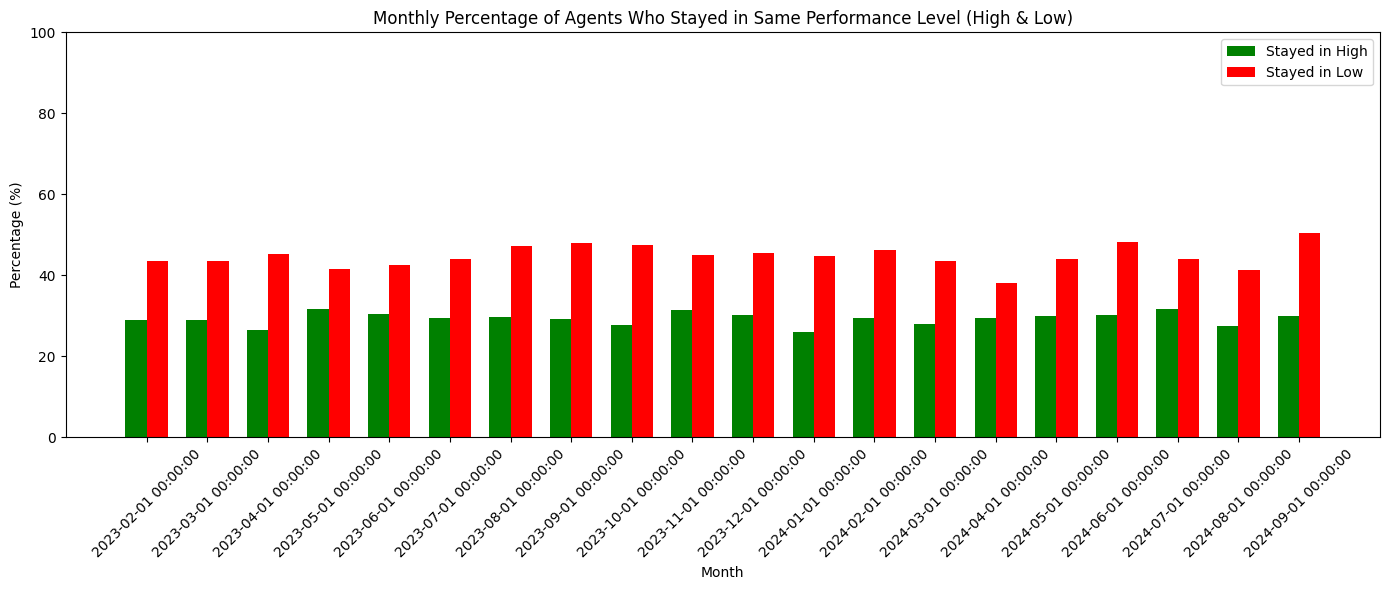

In [42]:
# Filter for agents who stayed in High
same_high = df_sorted[
    (df_sorted['previous_level'] == 'High') & 
    (df_sorted['performance_level'] == 'High')
]
total_prev_high = df_sorted[df_sorted['previous_level'] == 'High']

# Filter for agents who stayed in Low
same_low = df_sorted[
    (df_sorted['previous_level'] == 'Low') & 
    (df_sorted['performance_level'] == 'Low')
]
total_prev_low = df_sorted[df_sorted['previous_level'] == 'Low']

# Group and compute percentages
same_high_pct = (same_high.groupby('year_month').size() / total_prev_high.groupby('year_month').size()) * 100
same_low_pct = (same_low.groupby('year_month').size() / total_prev_low.groupby('year_month').size()) * 100

# Filled missing with 0
same_high_pct = same_high_pct.fillna(0).sort_index()
same_low_pct = same_low_pct.fillna(0).sort_index()

# Align both series to same x-axis
all_months = sorted(set(same_high_pct.index).union(set(same_low_pct.index)))
high_vals = [same_high_pct.get(month, 0) for month in all_months]
low_vals = [same_low_pct.get(month, 0) for month in all_months]

# X locations
x = np.arange(len(all_months))
width = 0.35

# Plot
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - width/2, high_vals, width, label='Stayed in High', color='green')
bars2 = plt.bar(x + width/2, low_vals, width, label='Stayed in Low', color='red')

plt.xticks(x, all_months, rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Who Stayed in Same Performance Level (High & Low)")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()


### Monthly Retention in Performance Levels

* For each month, the percentage of agents who remained in the **low** performance level is consistently higher than the percentage of agents who stayed in the **high** performance level.
* This suggests a stronger persistence among low-performing agents compared to those performing at a high level, indicating a potential need for targeted interventions to uplift and transition them to higher performance tiers.


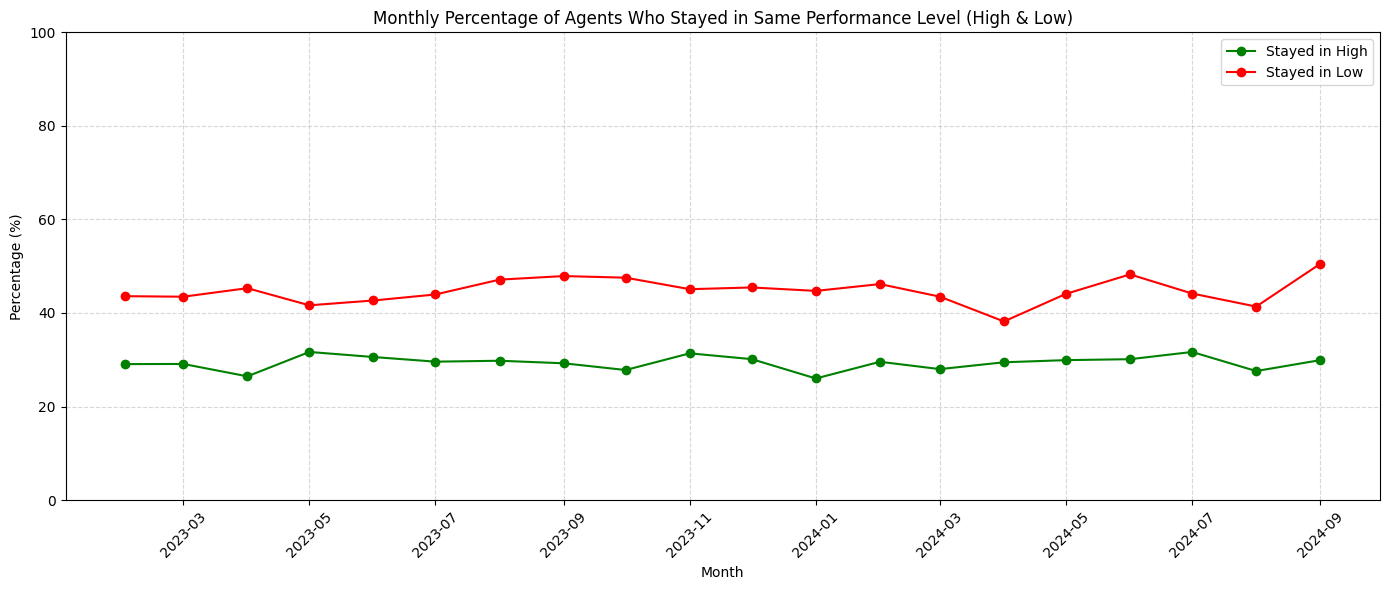

In [43]:
# Plot line graph
plt.figure(figsize=(14, 6))

plt.plot(all_months, high_vals, marker='o', color='green', label='Stayed in High')
plt.plot(all_months, low_vals, marker='o', color='red', label='Stayed in Low')

plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Month")
plt.title("Monthly Percentage of Agents Who Stayed in Same Performance Level (High & Low)")
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Calculating the average duration an agent stays in each performance level

Average Duration per Performance Level (in months):
performance_level
High    1.015477
Low     1.015924
Mid     1.014868
Name: duration_in_months, dtype: float64


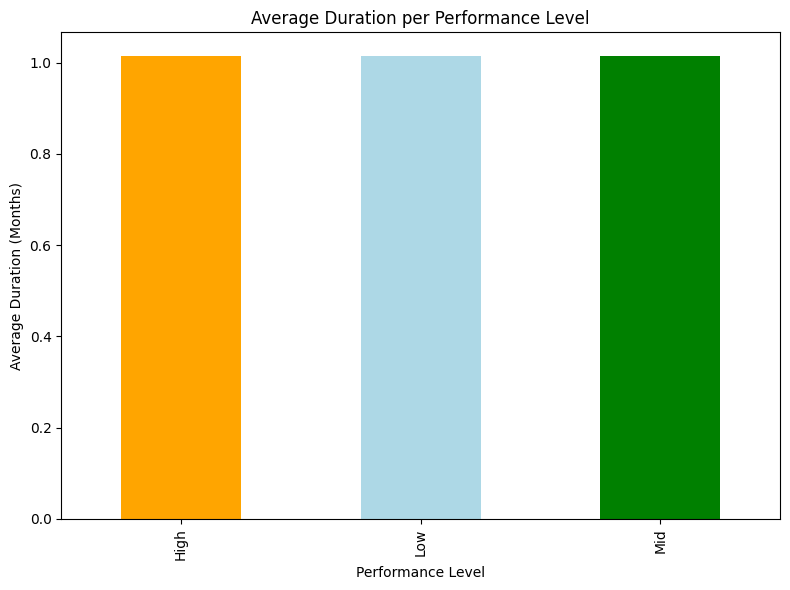

In [44]:
# Calculated the time difference between consecutive months for each agent
df_sorted['next_month'] = df_sorted.groupby('agent_code')['year_month'].shift(-1)
df_sorted['duration_in_months'] = (df_sorted['next_month'] - df_sorted['year_month']).dt.days / 30  # convert days to months

# Filter out rows with no transition (e.g., the last month for each agent)
df_sorted = df_sorted.dropna(subset=['duration_in_months'])

# Calculate the average duration for each performance level
avg_duration_per_level = df_sorted.groupby('performance_level')['duration_in_months'].mean()

# Display the result
print("Average Duration per Performance Level (in months):")
print(avg_duration_per_level)

# Plotting the average duration for each performance level
plt.figure(figsize=(8, 6))
avg_duration_per_level.plot(kind='bar', color=['orange', 'lightblue', 'green'])

# Adding labels and title
plt.xlabel('Performance Level')
plt.ylabel('Average Duration (Months)')
plt.title('Average Duration per Performance Level')

# Display the plot
plt.tight_layout()
plt.show()

* On average, each agent has spent approximately **one month** in each performance level.
* However, agents in the **low** performance category have tended to remain there for a **longer duration** compared to those in the **mid** and **high** performance levels.
* This indicates a need for more effective support strategies to help low-performing agents transition to higher levels.


### Calculating the most common performance level for newly joined agents

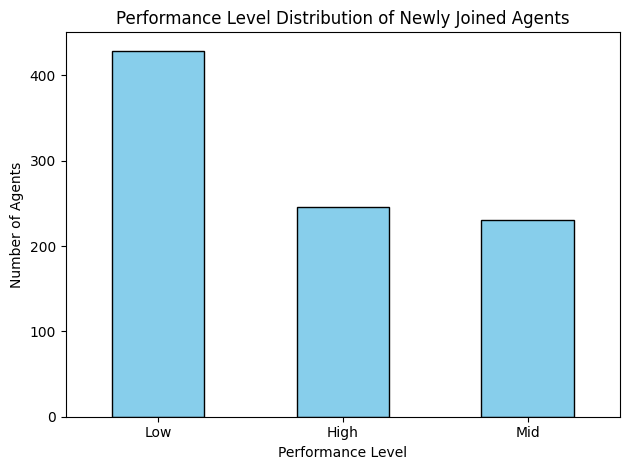

In [45]:
# Filter only newly joined agents
new_agents = df_sorted[df_sorted['movement'] == 'First Month']

# Count the occurrences of each performance level
performance_counts = new_agents['performance_level'].value_counts()

# Display the most common performance level
most_common_level = performance_counts.idxmax()
count = performance_counts.max()

performance_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Performance Level Distribution of Newly Joined Agents')
plt.xlabel('Performance Level')
plt.ylabel('Number of Agents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Initial Performance Level of Newly Joined Agents

* The most common performance level among **newly joined agents** is the **low** category.
* This suggests that most agents begin their performance journey at a lower tier, emphasizing the importance of early-stage training and onboarding programs to accelerate their progression.


# Custom Intervention Strategies for Each Performance Category

Based on the analysis, here are **custom intervention strategies** for each performance category, aligned with the insights we discovered:

---

### 🔴 **Low Performers**

**Insights:**

- Most new agents begin here.
- Highest percentage of agents remain in this level.
- Longest average duration spent in this level.
- Significant number transition from mid to low and from high to low.

**Recommended Interventions:**

- **Structured Onboarding:** Implement targeted training in the first month focusing on core KPIs.
- **Mentorship Program:** Pair new and low-performing agents with high performers.
- **KPI-based Coaching:** Use individual KPI metrics (like low `new_policy_count`, `net_income`) to deliver personalized coaching.
- **Incentives for Improvement:** Set up small, progressive goals with incentives to motivate upward movement.
- **Regular Feedback:** Weekly performance check-ins to keep agents aligned and accountable.

---

### ⚪ **Mid Performers**

**Insights:**

- Often transition down to low.
- Better at handling customer base metrics (e.g., `unique_customers`, `number_of_policy_holders`).
- Less likely to improve to high.

**Recommended Interventions:**

- **Skill Bridging:** Focused workshops to convert strong customer management into sales or revenue performance.
- **Peer Learning:** Learning sessions with high performers to understand high-level strategies.
- **Performance Review:** Use dashboards to identify stagnation early and apply timely nudges.
- **Recognition Programs:** Motivate and retain mid-performers by rewarding consistency and incremental improvements.

---

### 🟢 **High Performers**

**Insights:**

- Frequently drop to mid or low.
- Rare for low performers to reach this level.
- Strong in high-value KPIs like `ANBP`, `net_income`.

**Recommended Interventions:**

- **Sustainment Strategy:** Offer advanced skill training and leadership grooming to keep them challenged.
- **Performance Monitoring:** Closely monitor for early signs of decline and intervene quickly.
- **Retention Plan:** Provide career growth paths, bonuses, or role enhancements to maintain motivation.
- **Share Best Practices:** Encourage knowledge sharing to lift other performance levels.

---
